In [384]:
# common imports
from tqdm import tqdm

# pandas import
import pandas as pd 

# numpy import
import numpy as np
import numpy.linalg  as lg

# sklearn imports
import sklearn
from sklearn.linear_model import LinearRegression

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# import matplotlib
import matplotlib.pyplot as plt

In [212]:
data = pd.read_excel('Concrete_Data.xls')
data.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [214]:
display(data.isna().sum() ); print('\n')
# Null values checking

print('product description : \n  ')
data.describe()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64



product description : 
  


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Question - 1 : Analytical vs Sklearn 

### LinearRegression using Sklearn Model

In [215]:
# using Linear Regression

train, val, y_train, y_val = train_test_split( data.drop( ['Concrete compressive strength(MPa, megapascals) '], axis=1 ),
                                               data['Concrete compressive strength(MPa, megapascals) '], 
                                               test_size = 0.3,
                                               shuffle = True, # We can change here as 'Fasle' to not shuffle the data 
                                               random_state= 193,
                                               )
# Now training our Model
model = LinearRegression()
model.fit(train,y_train)

# getting out prediction for train and val set
prediction_val = model.predict(val)
prediction_train = model.predict(train)

# printing the R2 scores
print(f" R2 score of model in train set is : {r2_score(y_train,prediction_train)*100:.3f} ")
print(f" R2 score of model in validation set is : {r2_score(y_val,prediction_val)*100:.3f} \n")

# Printing the MSE values
print(f" MSE in train data is : {np.mean((y_train-prediction_train)**2):.3f} ")
print(f" MSE in validation data is : {np.mean((y_val-prediction_val)**2):.3f} ")

 R2 score of model in train set is : 62.092 
 R2 score of model in validation set is : 59.502 

 MSE in train data is : 107.153 
 MSE in validation data is : 108.592 


In [216]:
coeff, bias = model.coef_, model.intercept_

## Using Analytical solutions

Formula used : $ W = (X^TX + \alpha I) $<sup>-1</sup> $X^T Y$

$\alpha$ = 0 , as there is no regularization, (Generalized formula with regularization)

$ W = (X^TX) $<sup>-1</sup> $X^T Y$

In [217]:
# now Without Linear Regression, using Analytical Methods 

train['bias'] = [1]*(len(train)) # Adding bias column
val['bias'] = [1]*(len(val))

train.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),bias
382,505.0,0.0,60.0,195.0,0.0,1030.0,630.0,28,1
34,190.0,190.0,0.0,228.0,0.0,932.0,670.0,365,1
913,298.0,0.0,107.0,164.0,13.0,953.0,784.0,28,1


In [218]:
train_array = train.to_numpy() # Changing to np array to perform LinAlg operations
train_array.shape

(721, 9)

In [219]:
train_array.transpose().shape

(9, 721)

In [220]:
y_train_array =  np.expand_dims(y_train.to_numpy(), axis=1) # to change it from (729,) -> (729,1)
y_train_array.shape

(721, 1)

In [221]:
# Analytical sol :
# W = (X.transpose()*X).inverse() * (X.transpose() * Y)

# (X.transpose*X).inverse()
term_1 = lg.inv( (train_array.transpose()@train_array) )

w = term_1 @ ( train_array.transpose() @ y_train_array )

## Comparing coeff in each method

In [222]:
analytical_coef, analytical_bias = w[:-1], w[-1]

In [223]:
print(f"Bias term calculated by Analytical method : {analytical_bias[0]:.4f} and Bias by Model : {bias:.4f}")

Bias term calculated by Analytical method : 6.1596 and Bias by Model : 6.1596


In [224]:
print(f" coef terms by model : \n {analytical_coef.reshape(-1)} ")

 coef terms by model : 
 [ 0.11315061  0.0993798   0.08067047 -0.20471145  0.21857846  0.00782762
  0.01148195  0.12027704] 


In [225]:
print(f" coef terms by model : \n {coeff} ")

 coef terms by model : 
 [ 0.11315061  0.0993798   0.08067047 -0.20471145  0.21857846  0.00782762
  0.01148195  0.12027704] 


We can see both of them are almost except some last digits

In [226]:
# We can verify this by using np.allclose

print(f" Are the two coef terms (Analytical and Linear) equal : {np.allclose(analytical_coef.reshape(-1), coeff)} ")
print(f" Are the two bias terms (Analytical and Linear) equal : {np.allclose(analytical_bias.reshape(-1), bias)} ")

 Are the two coef terms (Analytical and Linear) equal : True 
 Are the two bias terms (Analytical and Linear) equal : True 


## Comparing R2 score in two methods

In [227]:
y_pred = (val.to_numpy() @ w).reshape(-1) # to change from (309,1) -> (309,)

print(f" R2 score by Analytical y_pred : {r2_score(y_val,y_pred)*100} ")
print(f" MSE obtained by Analytical method : {np.mean( (y_val.to_numpy()-y_pred)**2 )}")

 R2 score by Analytical y_pred : 59.50210154266039 
 MSE obtained by Analytical method : 108.5924636443653


***`Scores obtained by Sklearn Model is given in top section`***

So both of the score validation set is equal

# Question - 2 : L2 Regularization

### With Sklearn 

In [424]:
train, val = train.drop(['bias'],axis=1), val.drop( ['bias'] ,axis=1)

In [442]:
from sklearn.linear_model import Ridge

def regression_with_regularization(alphas = [1], print_enabled = True):

    R2_train, R2_val = [], []
    mse_train, mse_val = [], []

    if print_enabled :
        # printing the R2 scores
        print(f" R2 score of Linear model in train set is : {r2_score(y_train,prediction_train)*100:.3f} ")
        print(f" R2 score of Linear model in validation set is : {r2_score(y_val,prediction_val)*100:.3f} ")

        # Printing the MSE values
        print(f" MSE in Linear train data is : {np.mean((y_train-prediction_train)**2):.3f} ")
        print(f" MSE in Linear validation data is : {np.mean((y_val-prediction_val)**2):.3f} \n")

    for i in tqdm(alphas):
        
        model_2 = Ridge(alpha = i) # alpha is the weight multiplied with the L2 regularization
        model_2.fit(train,y_train)
        y_pred = model_2.predict(val)

        r2_t, r2_v = model_2.score(train,y_train)*100, model_2.score(val,y_val)*100
        mse_t, mse_v = np.mean((model_2.predict(train)-y_train)**2), np.mean( (model_2.predict(val)-y_val)**2 )

        #print(model_2.coef_, model_2.intercept_)
    

        if print_enabled :
            print(f" R2 score on the train_set is (with Regularization): {r2_t:.3f} ")
            print(f" R2 score on the val_set is (with Regularization): {r2_v:.3f} ")

            print(f" MSE loss for train set is (with Regularization): {mse_t} ")
            print(f" MSE loss for val set is (with Regularization): {mse_v} \n")

        R2_train.append(r2_t); R2_val.append(r2_v); mse_train.append(mse_t); mse_val.append(mse_v) 
    
    return R2_train, R2_val, mse_train, mse_val


In [446]:
alphas = np.arange(0,2e5,100)
info = regression_with_regularization(alphas, False)

100%|██████████| 2000/2000 [00:08<00:00, 235.05it/s]


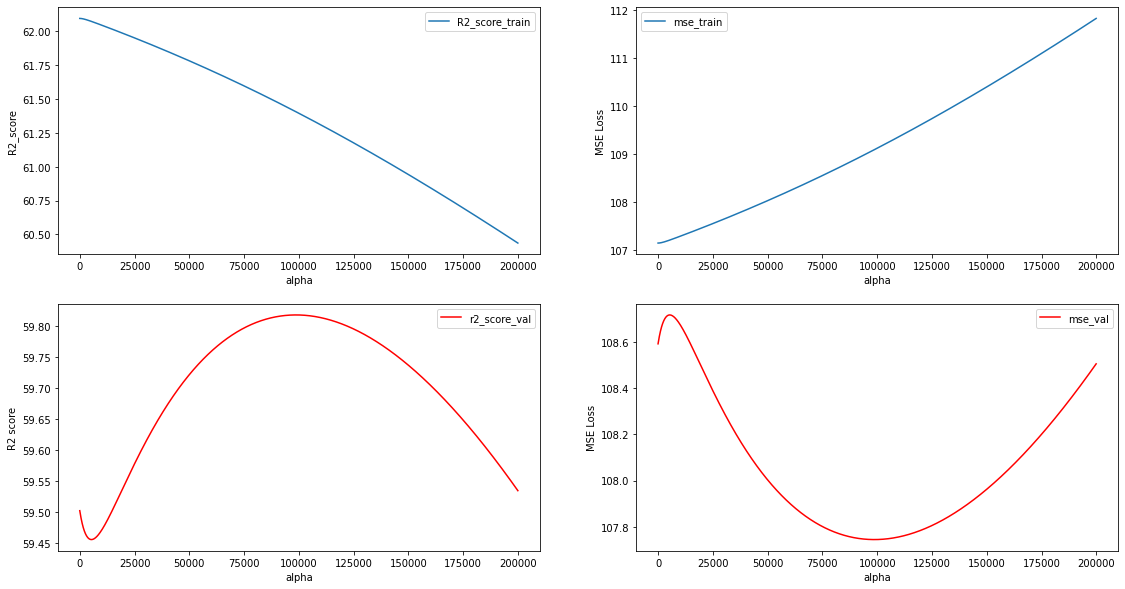

In [447]:
plt.figure(figsize=(19,10))

plt.subplot(2,2,1)
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.plot(alphas, info[0], label='R2_score_train')
#plt.plot(alphas, info[1], label='R2_score_val')
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.xlabel('alpha')
plt.ylabel('MSE Loss')
plt.plot(alphas, info[2], label='mse_train')
#plt.plot(alphas, info[3], label='mse_val')
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.xlabel('alpha')
plt.ylabel('R2 score')
#plt.plot(alphas, info[2], label='mse_train')
plt.plot(alphas, info[1], label='r2_score_val', color='r')
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.xlabel('alpha')
plt.ylabel('MSE Loss')
plt.plot(alphas, info[3], label='mse_val', color='r')
#plt.plot(alphas, info[3], label='mse_val')
plt.legend(loc='best')

plt.show()

so we can see there is only a slight variation in the R2 score according to the alpha values in L2 norm

We can conclude that, as the ***original weights are itself very small (|w|<1)*** , the ***effect of L2 norm is very less for small values of lambda*** as the extra **`error depends on the square of the weights`** 

***`That's why we can only see much change with higher alpha values`***

***`Around alpha = 1 lakh we can see , our model performs better on the validation data`*** , after that error starts increasing

In [230]:
# The change in results is almost equal to zero as, the weights are almost near tol zero so the L2 weight is almost near to zeros , so the error obtained by L2 regularization is very low 

(721, 8)

### With Numpy 

$ W = (X^TX + \alpha I) $<sup>-1</sup> $X^T Y$

The Given Equ is used to calculate the parameters with L2 regularization for a given ***"$\alpha$"*** value

In [448]:
train['bias'], val['bias'] = [1]*(len(train)), [1]*(len(val))

In [449]:
from sklearn.linear_model import Ridge

def numpy_regularization(alphas_list = [1], print_enabled = True):

    X,Y = train.to_numpy(), y_train.to_numpy()
    X_val, Y_val = val.to_numpy(), y_val.to_numpy()

    R2_train, R2_val = [], []
    mse_train, mse_val = [], []

    if print_enabled :
        # printing the R2 scores
        print(f" R2 score of Linear model in train set is : {r2_score(y_train,prediction_train)*100:.3f} ")
        print(f" R2 score of Linear model in validation set is : {r2_score(y_val,prediction_val)*100:.3f} ")

        # Printing the MSE values
        print(f" MSE in Linear train data is : {np.mean((y_train-prediction_train)**2):.3f} ")
        print(f" MSE in Linear validation data is : {np.mean((y_val-prediction_val)**2):.3f} \n")

    for alpha in tqdm(alphas_list):
        
        weights = lg.inv(( X.transpose()@X + alpha*np.identity(X.shape[1]) ))@(X.transpose()@Y) # alpha is the weight multiplied with the L2 regularization

        #print(weights)

        y_pred_train = X@weights
        y_pred_val = X_val@weights

        #raise Exception('test -1 ')

        r2_t, r2_v = r2_score(y_train, y_pred_train)*100, r2_score(Y_val, y_pred_val)*100
        mse_t, mse_v = np.mean((y_pred_train-y_train)**2), np.mean( (y_pred_val-Y_val)**2 )

        if print_enabled :
            print(f" R2 score on the train_set is (with Regularization): {r2_t:.3f} ")
            print(f" R2 score on the val_set is (with Regularization): {r2_v:.3f} ")

            print(f" MSE loss for train set is (with Regularization): {mse_t} ")
            print(f" MSE loss for val set is (with Regularization): {mse_v} \n")

        R2_train.append(r2_t); R2_val.append(r2_v); mse_train.append(mse_t); mse_val.append(mse_v) 
    
    return R2_train, R2_val, mse_train, mse_val


In [450]:
alphas = np.arange(0,2e5,100)
info = numpy_regularization(alphas, False)

100%|██████████| 2000/2000 [00:01<00:00, 1451.09it/s]


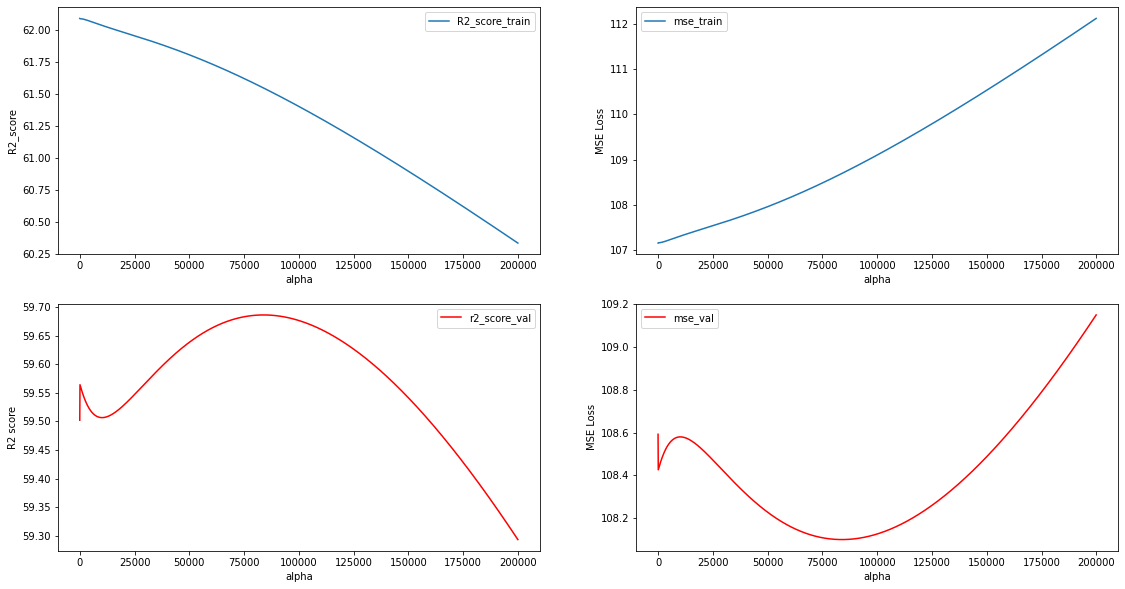

In [451]:
plt.figure(figsize=(19,10))

plt.subplot(2,2,1)
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.plot(alphas, info[0], label='R2_score_train')
#plt.plot(alphas, info[1], label='R2_score_val')
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.xlabel('alpha')
plt.ylabel('MSE Loss')
plt.plot(alphas, info[2], label='mse_train')
#plt.plot(alphas, info[3], label='mse_val')
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.xlabel('alpha')
plt.ylabel('R2 score')
#plt.plot(alphas, info[2], label='mse_train')
plt.plot(alphas, info[1], label='r2_score_val', color='r')
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.xlabel('alpha')
plt.ylabel('MSE Loss')
plt.plot(alphas, info[3], label='mse_val', color='r')
#plt.plot(alphas, info[3], label='mse_val')
plt.legend(loc='best')

plt.show()

***`A)`*** In Both cases, we can see that the ***`validation loss`*** increases at first, but it decreases after some point and continuously starts to increase

This shows we got ***`saturation after some-point`*** like ***`around 1lakh alpha`*** value , after which the r2_score decreases and loss increases in validation dataset

***`B)`*** For the first few alpha values, We are getting degrading results. But after that results getting improved , which tells us that ***`higher values of regularization required to prevent the model from over-fitting`*** 

# Question - 3 : Polynomial Regression

### Using Sklearn Package

In [453]:
train, val = train.drop(['bias'],axis=1), val.drop( ['bias'] ,axis=1)

In [454]:
from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(2)

train_degree_2 = poly_2.fit_transform(train)
val_degree_2 = poly_2.fit_transform(val)

# A)
print(f" Right now our data has total no : {train_degree_2.shape[1]} features, including power-1 features")

 Right now our data has total no : 45 features, including power-1 features


***`B)`***

In [305]:
model_poly = LinearRegression() # alpha is the weight multiplied with the L2 regularization
model_poly.fit(train_degree_2,y_train)
y_pred = model_poly.predict(val_degree_2)

print(f" R2 score on the train_set is : {model_poly.score(train_degree_2,y_train)*100:.5f} ")
print(f" R2 score on the train_set is : {model_poly.score(val_degree_2,y_val)*100:.5f} ")

print(f" MSE loss for train set is : {np.mean( (model_poly.predict(train_degree_2)-y_train)**2 )} ")
print(f" MSE loss for val set is : {np.mean( (model_poly.predict(val_degree_2)-y_val)**2 )} ")

print(f" \n Quadratic Model has been trained ")

 R2 score on the train_set is : 81.10764 
 R2 score on the train_set is : 78.10241 
 MSE loss for train set is : 53.40200629131388 
 MSE loss for val set is : 58.71694164411323 
 
 Quadratic Model has been trained 


***`c)`***

The ***`results got improved in Quality`*** , which we can infer ***`by seeing the MSE loss and the R2 score `*** os the train and validation set

R2 score got improved a lot and MSE Loss got reduced

***`D)`***


The formula for 3rd degree polynomial is :  <sup>n+2</sup>$ C_3 $

Here n = 8, so features = $\dfrac{(10)(9)(8)}{(2)(3)}$

Therefore $`120`$ features in power-3

In [459]:
poly_3 = PolynomialFeatures(3)

train_degree_3 = poly_3.fit_transform(train)
print(f" Right now our data has total no : {train_degree_3.shape[1]} features, including power-1 and power-2 features")
print(f" Features with power 3 is : {120} ")

 Right now our data has total no : 165 features, including power-1 and power-2 features
 Features with power 3 is : 120 
